## Cargar los Datos de Calidad de Agua

Lo primero que debemos hacer es abrir el archivo que contiene los datos que vamos a analizar. En este caso, el archivo se llama **"Calidad_de_agua_2021"**.

Para cargar el archivo en Python, utilizaremos la biblioteca `pandas`, que es ideal para manejar datos en formato de tablas (como CSV, Excel, etc.). A continuación, veremos cómo cargar este archivo y revisar sus primeras filas para asegurarnos de que todo está correcto.


In [65]:
# Importamos la librería pandas para el manejo de datos
import pandas as pd

# Cargamos el archivo "Calidad_de_agua_2021.csv"
raw_dataset = pd.read_csv("Calidad_de_agua_2021.csv", delimiter=';')

# Hacemos una copia del dataset original para realizar el preprocesamiento sin modificar los datos originales
preprocessed_dataset = raw_dataset.copy()

# Eliminamos columnas irrelevantes:
# - 'año': todas las mediciones son del año 2021, no aporta información adicional
# - 'orden', 'codigo': no son útiles para el análisis
# - 'fecha': la información sobre la fecha ya está contenida en la columna 'estación' y no varian durante la epoca
preprocessed_dataset = preprocessed_dataset.drop(['año', 'orden', 'codigo', 'fecha'], axis=1)

# Reemplazamos los valores 'no se midió' por valores nulos (NaN), para tratar los datos no medidos como ausentes
preprocessed_dataset = preprocessed_dataset.replace('no se midió', pd.NA)

# Eliminamos todas las filas que contienen valores nulos, ya que no queremos trabajar con datos incompletos
preprocessed_dataset = preprocessed_dataset.dropna()

# Creamos una copia del dataset preprocesado para proceder con la detección de duplicados
# Primero, eliminamos las columnas 'sitios' y 'campaña', que no son necesarias para encontrar duplicados ya que son unicas
datos = preprocessed_dataset.copy()
datos = datos.drop(['sitios', 'campaña'], axis=1)

# Buscamos filas duplicadas en el dataset sin las columnas 'sitios' y 'campaña'
# 'keep=False' marca todas las filas duplicadas (no solo la primera)
indices_duplicados = datos[datos.duplicated(keep=False)]

# Mostramos los índices duplicados encontrados (si los hay)
indices_duplicados

# Si no hay duplicados, no es necesario realizar ninguna acción adicional en este punto


,tem_agua,tem_aire,od,ph,olores,color,espumas,mat_susp,colif_fecales_ufc_100ml,escher_coli_ufc_100ml,...,dbo_mg_l,dqo_mg_l,turbiedad_ntu,hidr_deriv_petr_ug_l,cr_total_mg_l,cd_total_mg_l,clorofila_a_ug_l,microcistina_ug_l,ica,calidad_de_agua


## Exploración de la Información de la Base de Datos

Una vez que hemos cargado y limpiado los datos, es importante verificar la estructura general de nuestro conjunto de datos. Para esto, utilizamos el método `info()` de pandas, el cual nos proporciona una visión general de las columnas, el número de entradas no nulas, el tipo de datos de cada columna y el uso de memoria del DataFrame.

Este método es útil para:
- Verificar si hay columnas con valores nulos.
- Observar los tipos de datos de las columnas (importante para asegurarnos de que pandas está interpretando correctamente los datos).
- Tener una idea del tamaño del conjunto de datos.

In [66]:
preprocessed_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121 entries, 0 to 165
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   sitios                   121 non-null    object
 1   campaña                  121 non-null    object
 2   tem_agua                 121 non-null    object
 3   tem_aire                 121 non-null    object
 4   od                       121 non-null    object
 5   ph                       121 non-null    object
 6   olores                   121 non-null    object
 7   color                    121 non-null    object
 8   espumas                  121 non-null    object
 9   mat_susp                 121 non-null    object
 10  colif_fecales_ufc_100ml  121 non-null    object
 11  escher_coli_ufc_100ml    121 non-null    object
 12  enteroc_ufc_100ml        121 non-null    object
 13  nitrato_mg_l             121 non-null    object
 14  nh4_mg_l                 121 non-null    object

## Revisión de Tipos de Datos

Al examinar la información del conjunto de datos utilizando el método `info()`, hemos notado que **todas las columnas están clasificadas como de tipo `object`**. Sin embargo, sabemos que muchas de estas columnas contienen valores numéricos, lo que indica que el tipo de dato no ha sido interpretado correctamente por pandas.

Este es un problema común cuando se trabaja con archivos CSV u otros formatos, especialmente si los datos numéricos están representados como cadenas de texto (strings) debido a la forma en que se almacenaron o se importaron.

### ¿Por qué es importante corregir esto?
Es fundamental que las columnas que deberían contener valores numéricos sean tratadas como tales. Esto permitirá:
- Realizar cálculos y análisis estadísticos correctos.
- Evitar errores o resultados incorrectos debido a la manipulación de datos como texto.

A continuación, corregiremos los tipos de datos para asegurar que las columnas con valores numéricos sean reconocidas y tratadas como tales.

In [ ]:
preprocessed_dataset['color'] = preprocessed_dataset['color'].replace(['ausenca','Ausencia ','Ausencia'], False)
preprocessed_dataset['color'] = preprocessed_dataset['color'].replace('Presencia', True)
preprocessed_dataset['olores'] = preprocessed_dataset['olores'].replace(['ausenca','Ausencia ','Ausencia'], False)
preprocessed_dataset['olores'] = preprocessed_dataset['olores'].replace('Presencia', True)
preprocessed_dataset['espumas'] = preprocessed_dataset['espumas'].replace(['ausenca','Ausencia ','Ausencia'], False)
preprocessed_dataset['espumas'] = preprocessed_dataset['espumas'].replace('Presencia', True)
preprocessed_dataset['mat_susp'] = preprocessed_dataset['mat_susp'].replace(['ausenca','Ausencia ','Ausencia'], False)
preprocessed_dataset['mat_susp'] = preprocessed_dataset['mat_susp'].replace('Presencia', True)

preprocessed_dataset = preprocessed_dataset.dropna(subset=['enteroc_ufc_100ml', 'escher_coli_ufc_100ml', 'ica','tem_agua','tem_aire','od','ph'])

preprocessed_dataset['tem_agua'] = preprocessed_dataset['tem_agua'].astype(float)
preprocessed_dataset['tem_aire'] = preprocessed_dataset['tem_aire'].astype(float)
preprocessed_dataset['od'] = preprocessed_dataset['od'].astype(float)
preprocessed_dataset['ph'] = preprocessed_dataset['ph'].astype(float)

preprocessed_dataset['escher_coli_ufc_100ml'] = preprocessed_dataset['escher_coli_ufc_100ml'].astype(int)
preprocessed_dataset['enteroc_ufc_100ml'] = preprocessed_dataset['enteroc_ufc_100ml'].astype(int)
preprocessed_dataset['ica'] = preprocessed_dataset['ica'].astype(int)

C:\Users\marti\AppData\Local\Temp\ipykernel_23480\3960310691.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  preprocessed_dataset['color'] = preprocessed_dataset['color'].replace('Presencia', True)
C:\Users\marti\AppData\Local\Temp\ipykernel_23480\3960310691.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  preprocessed_dataset['olores'] = preprocessed_dataset['olores'].replace('Presencia', True)
C:\Users\marti\AppData\Local\Temp\ipykernel_23480\3960310691.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated

In [5]:
#Como el 75% de los datos son menores a 15000, decidimos que todos los mayores a 40000 sean eliminado, ya que resultan extraños
preprocessed_dataset['colif_fecales_ufc_100ml'] = preprocessed_dataset['colif_fecales_ufc_100ml'].replace('>100000', 100000)
preprocessed_dataset['colif_fecales_ufc_100ml'] = preprocessed_dataset['colif_fecales_ufc_100ml'].astype(int)

In [6]:
preprocessed_dataset = preprocessed_dataset.dropna(subset=['nitrato_mg_l'])
preprocessed_dataset['nitrato_mg_l'] = preprocessed_dataset['nitrato_mg_l'].replace(['<2.0'], '2')
preprocessed_dataset['nitrato_mg_l'] = preprocessed_dataset['nitrato_mg_l'].astype(float)

In [7]:
preprocessed_dataset['nh4_mg_l'] = preprocessed_dataset['nh4_mg_l'].replace('<0.05', '0.05')
preprocessed_dataset['nh4_mg_l'] = preprocessed_dataset['nh4_mg_l'].astype(float)

In [8]:
preprocessed_dataset['p_total_l_mg_l'] = preprocessed_dataset['p_total_l_mg_l'].replace('<0.20', '0.20')
preprocessed_dataset['p_total_l_mg_l'] = preprocessed_dataset['p_total_l_mg_l'].astype(float)

In [9]:
preprocessed_dataset['fosf_ortofos_mg_l'] = preprocessed_dataset['fosf_ortofos_mg_l'].replace('<0.10', '0.10')
preprocessed_dataset['fosf_ortofos_mg_l'] = preprocessed_dataset['fosf_ortofos_mg_l'].replace('<0.20', '0.20')
preprocessed_dataset['fosf_ortofos_mg_l'] = preprocessed_dataset['fosf_ortofos_mg_l'].astype(float)

In [10]:
preprocessed_dataset['dbo_mg_l'] = preprocessed_dataset['dbo_mg_l'].replace('<2.0', '2.0')
preprocessed_dataset['dbo_mg_l'] = preprocessed_dataset['dbo_mg_l'].replace('<5', '5')
preprocessed_dataset['dbo_mg_l'] = preprocessed_dataset['dbo_mg_l'].dropna()
preprocessed_dataset['dbo_mg_l'] = preprocessed_dataset['dbo_mg_l'].astype(float)

In [11]:
# Como en cuanta la variable anterior 'dbo_mg_l', entra en sus rangos, por lo que el
# nombre es muy similar, pensamos que lo agregaron por equivocacion
preprocessed_dataset['dqo_mg_l'] = preprocessed_dataset['dqo_mg_l'].replace(['<2.0','4.5','9,8'], pd.NA)
preprocessed_dataset['dqo_mg_l'] = preprocessed_dataset['dqo_mg_l'].replace('<30', '30')
preprocessed_dataset['dqo_mg_l'] = preprocessed_dataset['dqo_mg_l'].replace('<50', '50')
preprocessed_dataset['dqo_mg_l'] = preprocessed_dataset['dqo_mg_l'].dropna()
preprocessed_dataset['dqo_mg_l'] = preprocessed_dataset['dqo_mg_l'].astype(float)

In [12]:
preprocessed_dataset['turbiedad_ntu'] = preprocessed_dataset['turbiedad_ntu'].replace('<30', '30')
preprocessed_dataset['turbiedad_ntu'] = preprocessed_dataset['turbiedad_ntu'].astype(float)

In [13]:
preprocessed_dataset['hidr_deriv_petr_ug_l'] = preprocessed_dataset['hidr_deriv_petr_ug_l'].replace('<100', '100')
preprocessed_dataset['hidr_deriv_petr_ug_l'] = preprocessed_dataset['hidr_deriv_petr_ug_l'].astype(float)

In [14]:
preprocessed_dataset['cd_total_mg_l'] = preprocessed_dataset['cd_total_mg_l'].replace('<0.001', '0.001')
preprocessed_dataset['cd_total_mg_l'] = preprocessed_dataset['cd_total_mg_l'].replace(['<0.005','0.005','0.0017'], '0.005')
preprocessed_dataset['cd_total_mg_l'] = preprocessed_dataset['cd_total_mg_l'].replace(['0.007','0.008','<0.010'], '0.010')
preprocessed_dataset['cd_total_mg_l'] = preprocessed_dataset['cd_total_mg_l'].astype(float)
preprocessed_dataset.rename(columns={'cd_total_mg_l': 'cd_total_mg_l_menor_que'}, inplace=True)

In [15]:
preprocessed_dataset['cr_total_mg_l'] = preprocessed_dataset['cr_total_mg_l'].replace('<0.005', '0.005')
# asumimos que hubo un error al cargar este datos
preprocessed_dataset['cr_total_mg_l'] = preprocessed_dataset['cr_total_mg_l'].replace('<5.0', '0.005')

preprocessed_dataset['cr_total_mg_l'] = preprocessed_dataset['cr_total_mg_l'].replace(['<100','<10'], '1')
preprocessed_dataset['cr_total_mg_l'] = preprocessed_dataset['cr_total_mg_l'].astype(float)

In [16]:
preprocessed_dataset['clorofila_a_ug_l'] = preprocessed_dataset['clorofila_a_ug_l'].replace(['<0.010','<0.01'], '0.010')
preprocessed_dataset['clorofila_a_ug_l'] = preprocessed_dataset['clorofila_a_ug_l'].replace('<0.001', '0.010')
preprocessed_dataset['clorofila_a_ug_l'] = preprocessed_dataset['clorofila_a_ug_l'].astype(float)

In [17]:
preprocessed_dataset['microcistina_ug_l'] = preprocessed_dataset['microcistina_ug_l'].replace(['< 10.000','<10.000'], '1.0')
preprocessed_dataset['microcistina_ug_l'] = preprocessed_dataset['microcistina_ug_l'].replace('<0.20', '0.2')
preprocessed_dataset['microcistina_ug_l'] = preprocessed_dataset['microcistina_ug_l'].replace('<0.15', '0.15')
preprocessed_dataset['microcistina_ug_l'] = preprocessed_dataset['microcistina_ug_l'].astype(float)

In [18]:
preprocessed_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129 entries, 0 to 165
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sitios                   129 non-null    object 
 1   campaña                  129 non-null    object 
 2   tem_agua                 129 non-null    float64
 3   tem_aire                 129 non-null    float64
 4   od                       129 non-null    float64
 5   ph                       129 non-null    float64
 6   olores                   129 non-null    bool   
 7   color                    129 non-null    bool   
 8   espumas                  129 non-null    bool   
 9   mat_susp                 129 non-null    bool   
 10  colif_fecales_ufc_100ml  129 non-null    int64  
 11  escher_coli_ufc_100ml    129 non-null    int64  
 12  enteroc_ufc_100ml        129 non-null    int64  
 13  nitrato_mg_l             129 non-null    float64
 14  nh4_mg_l                 129 no

In [19]:
preprocessed_dataset.describe()

,tem_agua,tem_aire,od,ph,colif_fecales_ufc_100ml,escher_coli_ufc_100ml,enteroc_ufc_100ml,nitrato_mg_l,nh4_mg_l,p_total_l_mg_l,fosf_ortofos_mg_l,dbo_mg_l,dqo_mg_l,turbiedad_ntu,hidr_deriv_petr_ug_l,cr_total_mg_l,cd_total_mg_l_menor_que,clorofila_a_ug_l,microcistina_ug_l,ica
count,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,123.000000,123.000000,129.000000,129.000000,128.000000,129.000000,129.000000,129.000000,129.000000
mean,18.699225,18.931008,6.637674,7.594574,18861.395349,4877.558140,867.294574,4.237209,2.224341,0.559922,0.436667,4.966667,34.295935,28.901550,99.937209,0.796733,0.002116,0.024330,0.373643,44.891473
std,5.648901,8.035330,3.177327,0.754451,34231.665023,11107.844165,2662.014244,2.784838,4.041534,0.358261,0.282487,2.758732,23.055729,23.438087,34.419755,4.150970,0.002156,0.079239,0.343470,9.819655
min,7.000000,4.000000,0.590000,6.660000,100.000000,5.000000,2.000000,2.000000,0.050000,0.190000,0.100000,2.000000,2.200000,4.900000,6.900000,0.005000,0.001000,0.000000,0.150000,26.000000
25%,14.400000,12.600000,4.240000,6.960000,2000.000000,200.000000,58.000000,2.300000,0.440000,0.290000,0.260000,2.700000,30.000000,16.000000,100.000000,0.005000,0.001000,0.010000,0.200000,38.000000
50%,16.700000,18.000000,6.120000,7.470000,5000.000000,1000.000000,200.000000,3.500000,0.980000,0.460000,0.360000,4.300000,30.000000,27.000000,100.000000,0.005000,0.001000,0.010000,0.200000,44.000000
75%,24.500000,27.000000,8.900000,7.960000,15000.000000,3000.000000,700.000000,5.400000,2.800000,0.750000,0.530000,6.650000,37.000000,31.000000,100.000000,0.254275,0.001000,0.010000,0.200000,50.000000
max,28.000000,33.000000,15.200000,9.660000,190000.000000,70000.000000,28000.000000,22.100000,39.000000,1.900000,1.500000,14.000000,140.000000,210.000000,340.000000,44.000000,0.010000,0.840160,1.000000,74.000000


In [20]:
preprocessed_dataset['colif_fecales_ufc_100ml'] = preprocessed_dataset['colif_fecales_ufc_100ml'].where(preprocessed_dataset['colif_fecales_ufc_100ml'] <= 50000, pd.NA)
preprocessed_dataset['colif_fecales_ufc_100ml'].value_counts().sort_index(ascending = False)

colif_fecales_ufc_100ml
42000.0     1
40000.0     4
32000.0     1
30000.0     3
29000.0     1
28000.0     1
25000.0     1
20000.0     5
15000.0     4
14000.0     2
12000.0     1
10000.0     8
9000.0      2
8300.0      1
8000.0      3
7600.0      1
7000.0      1
6200.0      1
6100.0      1
6000.0      4
5300.0      1
5100.0      1
5000.0      8
4200.0      1
4000.0     10
3800.0      1
3600.0      1
3000.0      7
2800.0      1
2500.0      1
2250.0      1
2200.0      1
2000.0      5
1900.0      1
1800.0      2
1600.0      1
1300.0      1
1200.0      1
1000.0      7
800.0       1
700.0       1
600.0       1
500.0       1
400.0       6
300.0       4
160.0       1
110.0       1
100.0       1
Name: count, dtype: int64

In [21]:
preprocessed_dataset.isna().sum()

sitios                      0
campaña                     0
tem_agua                    0
tem_aire                    0
od                          0
ph                          0
olores                      0
color                       0
espumas                     0
mat_susp                    0
colif_fecales_ufc_100ml    14
escher_coli_ufc_100ml       0
enteroc_ufc_100ml           0
nitrato_mg_l                0
nh4_mg_l                    0
p_total_l_mg_l              0
fosf_ortofos_mg_l           0
dbo_mg_l                    6
dqo_mg_l                    6
turbiedad_ntu               0
hidr_deriv_petr_ug_l        0
cr_total_mg_l               1
cd_total_mg_l_menor_que     0
clorofila_a_ug_l            0
microcistina_ug_l           0
ica                         0
calidad_de_agua             0
dtype: int64

In [22]:
# calculamos las correlaciones entre features e imprimimos la matriz
variables_cuantitativas = preprocessed_dataset.drop(['sitios','campaña','olores','color','espumas','mat_susp','calidad_de_agua'], axis=1)
correlation_matrix = variables_cuantitativas.corr()
correlation_matrix

,tem_agua,tem_aire,od,ph,colif_fecales_ufc_100ml,escher_coli_ufc_100ml,enteroc_ufc_100ml,nitrato_mg_l,nh4_mg_l,p_total_l_mg_l,fosf_ortofos_mg_l,dbo_mg_l,dqo_mg_l,turbiedad_ntu,hidr_deriv_petr_ug_l,cr_total_mg_l,cd_total_mg_l_menor_que,clorofila_a_ug_l,microcistina_ug_l,ica
tem_agua,1.000000,0.852244,-0.348458,-0.360090,-0.149546,-0.013977,-0.140228,0.105216,-0.031675,0.165945,-0.097125,-0.321754,0.156213,0.058113,-0.004771,0.103640,-0.369268,0.094432,-0.363793,-0.102393
tem_aire,0.852244,1.000000,-0.264385,-0.257822,-0.117642,-0.048149,-0.023540,0.005300,0.006250,0.131883,-0.029523,-0.305902,0.286473,0.075718,0.032757,0.074743,-0.341329,0.067636,-0.397022,-0.138683
od,-0.348458,-0.264385,1.000000,0.762981,-0.242821,-0.283530,-0.130976,0.122511,-0.325050,-0.381444,-0.351347,0.043163,0.166979,0.129297,0.133588,0.029127,0.134743,0.272233,0.142808,0.514992
ph,-0.360090,-0.257822,0.762981,1.000000,-0.121899,-0.153652,-0.044409,0.175179,-0.148730,-0.145566,-0.115142,0.201977,0.196943,0.165938,-0.043279,0.029146,0.133691,0.331928,0.118531,0.312791
colif_fecales_ufc_100ml,-0.149546,-0.117642,-0.242821,-0.121899,1.000000,0.562475,0.391177,-0.110011,0.121383,0.102945,0.229710,0.179300,-0.115183,-0.209408,-0.075946,-0.071330,0.110617,-0.068426,0.163314,-0.584848
escher_coli_ufc_100ml,-0.013977,-0.048149,-0.283530,-0.153652,0.562475,1.000000,0.329406,-0.076316,0.218213,0.151813,0.282319,0.292961,-0.131686,-0.082032,-0.105264,-0.018360,0.265977,0.083651,0.247298,-0.446939
enteroc_ufc_100ml,-0.140228,-0.023540,-0.130976,-0.044409,0.391177,0.329406,1.000000,-0.036622,0.400276,0.339819,0.463206,0.252559,0.073460,-0.106724,-0.005299,0.054681,0.062915,-0.024732,0.013149,-0.380564
nitrato_mg_l,0.105216,0.005300,0.122511,0.175179,-0.110011,-0.076316,-0.036622,1.000000,-0.119188,-0.059337,-0.153414,-0.080964,-0.130978,0.034878,-0.077942,0.084172,0.083312,0.054479,0.148257,0.085313
nh4_mg_l,-0.031675,0.006250,-0.325050,-0.148730,0.121383,0.218213,0.400276,-0.119188,1.000000,0.447768,0.430597,0.185561,0.055426,-0.132931,-0.084665,-0.056575,0.059462,-0.077400,0.003941,-0.415267
p_total_l_mg_l,0.165945,0.131883,-0.381444,-0.145566,0.102945,0.151813,0.339819,-0.059337,0.447768,1.000000,0.737284,0.093165,0.142138,0.012797,-0.086255,0.031259,-0.061369,-0.046372,-0.189850,-0.492026


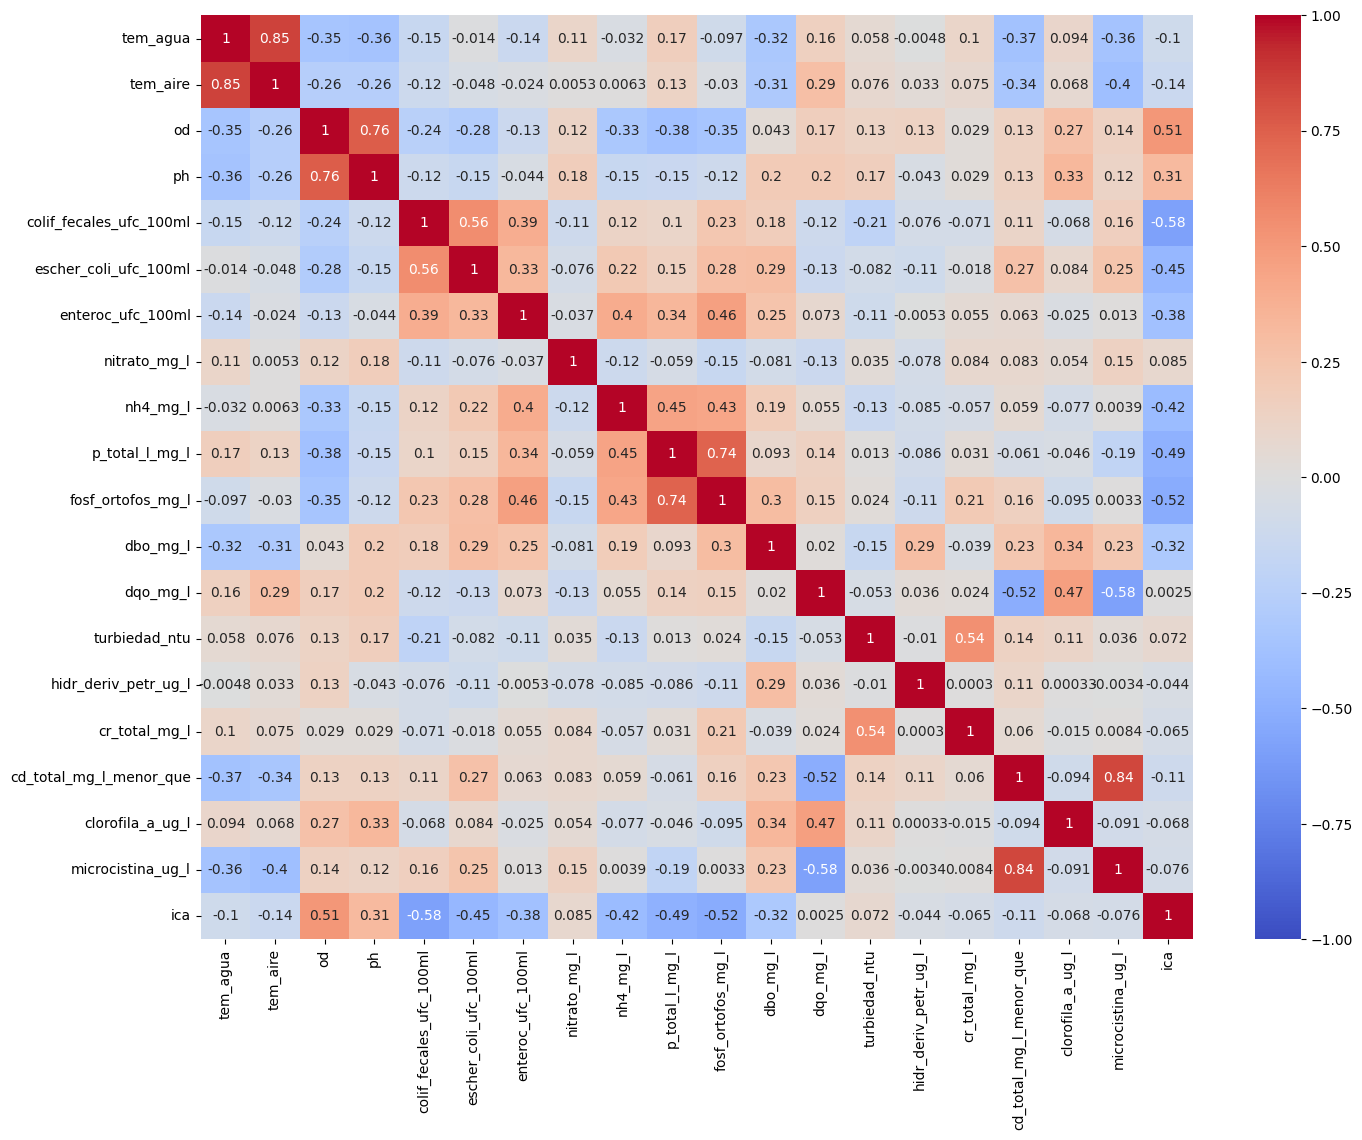

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# imprimimos la matriz como un heatmap
plt.figure(figsize=(16,12))
sns.heatmap(correlation_matrix, vmin=-1.0, vmax=1.0, center=0.0, annot=True, cmap= 'coolwarm')
plt.show()

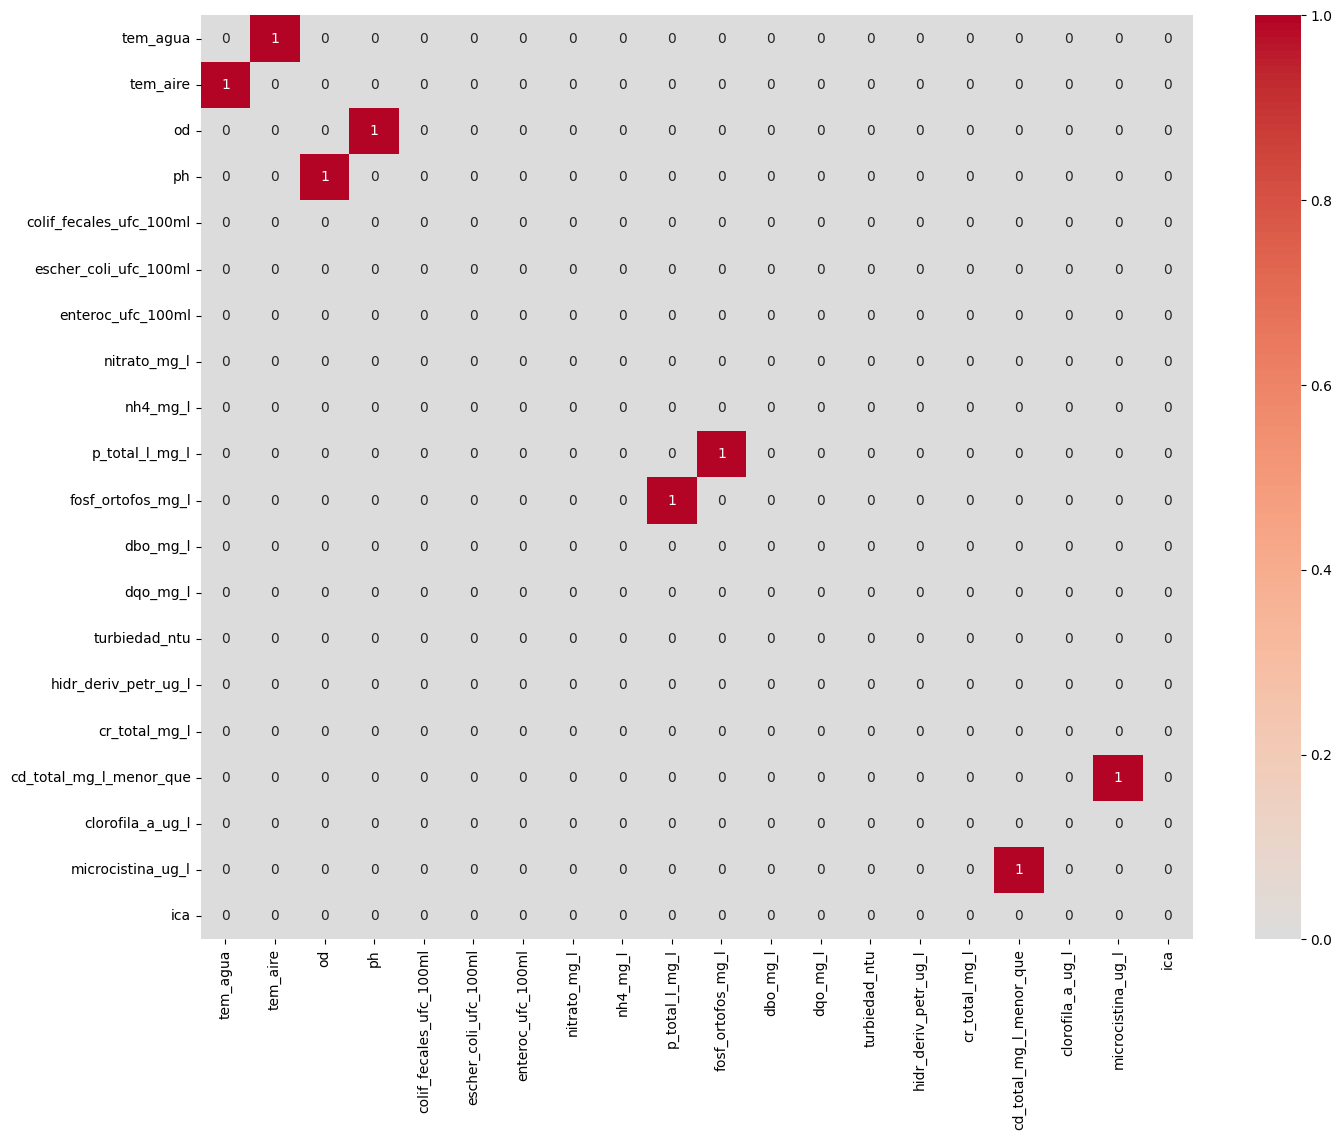

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# tomamos el valor absoluto de las correlaciones, umbralamos las mayores a 0.7
correlation_matrix_umbralizada = correlation_matrix.abs() > 0.7
# aprovechamos y sacamos la diagonal
np.fill_diagonal(correlation_matrix_umbralizada.values, 0)

# e imprimimos la matriz como un heatmap
plt.figure(figsize=(16,12))
sns.heatmap(correlation_matrix_umbralizada, vmin=0.0, vmax=1.0, center=0.0, annot=True, cmap= 'coolwarm')
plt.show()

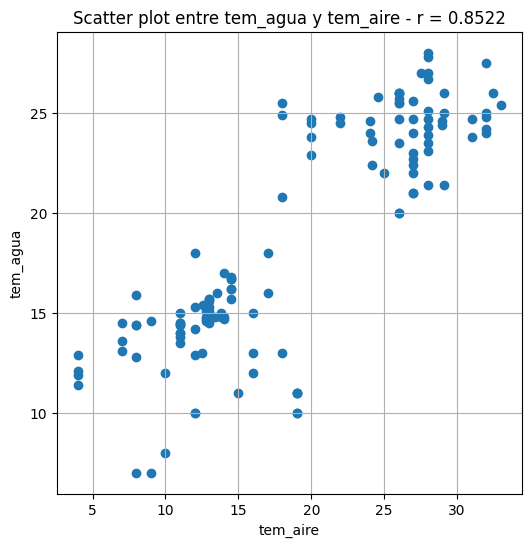

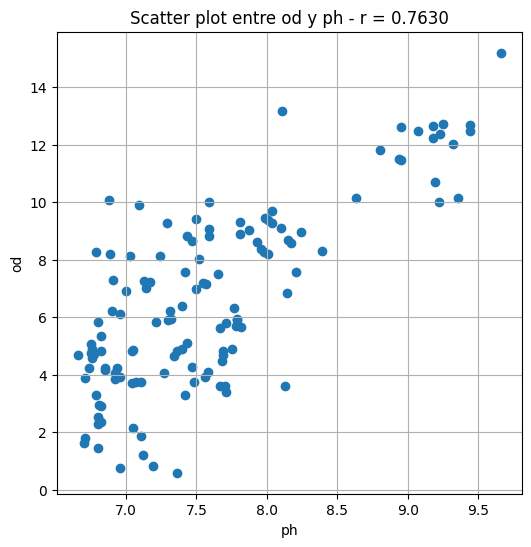

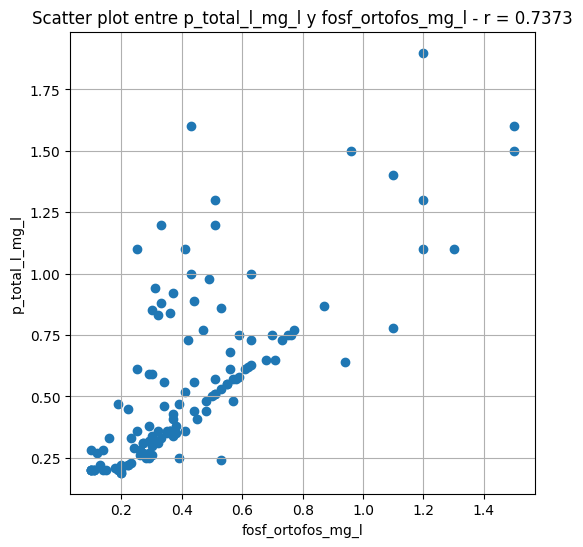

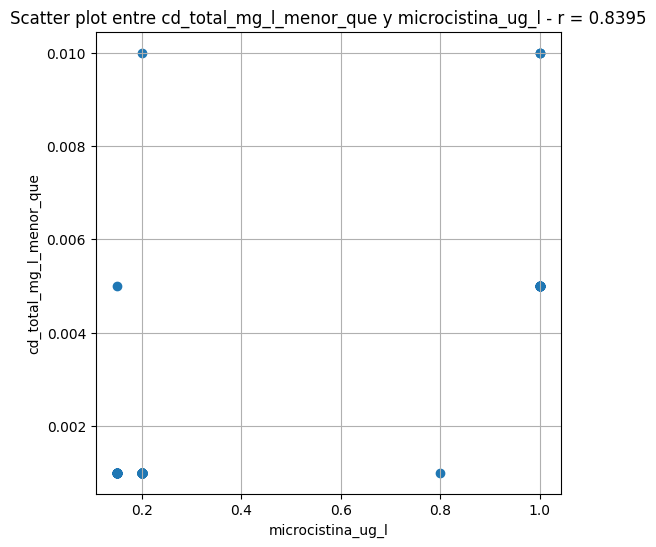

In [25]:
for i, col in enumerate(correlation_matrix_umbralizada.columns):
  # y por cada una de las filas (para eso usamos el índice)
  for j in range(i,len(correlation_matrix_umbralizada.index)):
    # extraemos el nombre de la fila en la que estamos
    row = correlation_matrix_umbralizada.index[j]
    # si en esa posición tenemos un True en la matriz umbralizada
    if correlation_matrix_umbralizada.loc[row, col]:
      # nos traemos el valor de esa correlación
      correlation = correlation_matrix.loc[row, col]
      # representamos en un scatter plot cuadrado los valores de ambas variables
      plt.figure(figsize=(6, 6))
      plt.scatter(preprocessed_dataset[row], preprocessed_dataset[col])
      # y lo mostramos bonito
      plt.title(f"Scatter plot entre {col} y {row} - r = {correlation:.4f}")
      plt.xlabel(row)
      plt.ylabel(col)
      plt.grid(True)
      plt.show()

In [26]:
import webbrowser
from pathlib import Path
from ydata_profiling import ProfileReport

# Verificamos si el archivo ya existe
output_file = "calidad del agua.html"
if not Path(output_file).exists():
    try:
        # Generamos el reporte
        report = ProfileReport(preprocessed_dataset)
        
        # Guardamos el reporte como un archivo HTML
        report.to_file(output_file=output_file)
        print(f"Reporte generado y guardado como {output_file}.")
    except Exception as e:
        print(f"Ocurrió un error al generar el reporte: {e}")
else:
    print("El archivo ya está creado.")

# Abrir el archivo HTML
webbrowser.open(output_file)


c:\Users\marti\OneDrive\Escritorio\facultad\3° Año\2° Cuatrimestre\Fundamentos de la Ciencia de Datos\python\Tp Especial\Trabajo Practico\Calidad_Agua\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


El archivo ya está creado.


True

In [27]:
preprocessed_dataset['enteroc_ufc_100ml'] = preprocessed_dataset['enteroc_ufc_100ml'].replace(28000, 2800)
preprocessed_dataset['enteroc_ufc_100ml'].value_counts().sort_index(ascending=False)

enteroc_ufc_100ml
6200    1
5600    1
4800    1
4600    2
3700    1
       ..
10      5
6       1
5       2
4       1
2       1
Name: count, Length: 72, dtype: int64

In [28]:
preprocessed_dataset.columns

Index(['sitios', 'campaña', 'tem_agua', 'tem_aire', 'od', 'ph', 'olores',
       'color', 'espumas', 'mat_susp', 'colif_fecales_ufc_100ml',
       'escher_coli_ufc_100ml', 'enteroc_ufc_100ml', 'nitrato_mg_l',
       'nh4_mg_l', 'p_total_l_mg_l', 'fosf_ortofos_mg_l', 'dbo_mg_l',
       'dqo_mg_l', 'turbiedad_ntu', 'hidr_deriv_petr_ug_l', 'cr_total_mg_l',
       'cd_total_mg_l_menor_que', 'clorofila_a_ug_l', 'microcistina_ug_l',
       'ica', 'calidad_de_agua'],
      dtype='object')

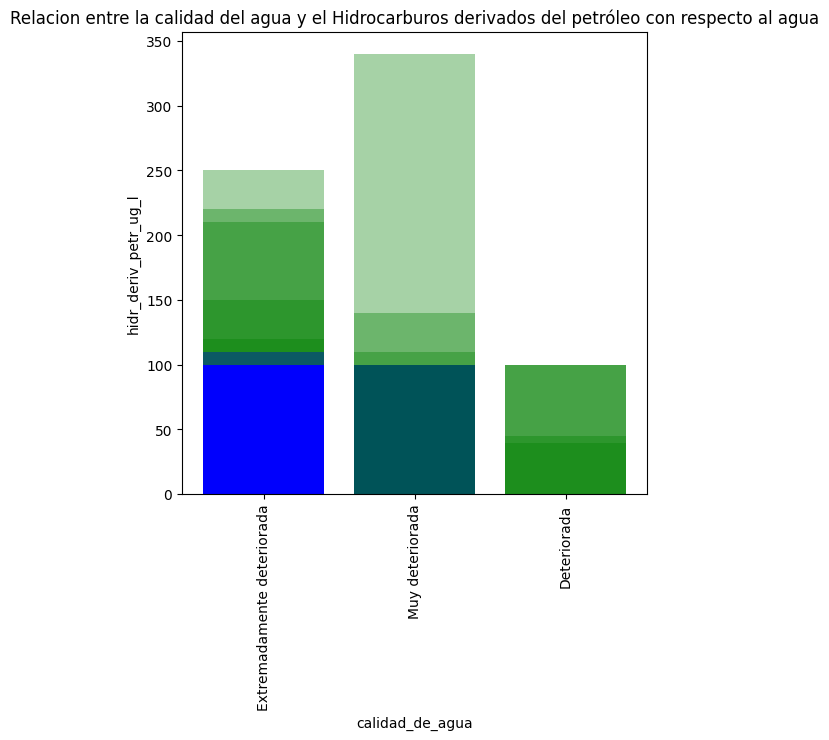

In [29]:
import matplotlib.pyplot as plt

# Crear el gráfico de dispersión
plt.figure(figsize=(6, 6))  # Hacer el gráfico cuadrado

# Filtrar los datos por CHAS
color_false = preprocessed_dataset[preprocessed_dataset["color"] == False]
color_true = preprocessed_dataset[preprocessed_dataset["color"] == True]

# Graficar los puntos con colores diferentes
plt.bar(color_false["calidad_de_agua"], color_false["hidr_deriv_petr_ug_l"], color="green", alpha=0.35, label="No presentan color")
plt.bar(color_true["calidad_de_agua"], color_true["hidr_deriv_petr_ug_l"], color="blue", alpha=0.35, label="Presentan color")

# Agregar etiquetas a los ejes
plt.xlabel("calidad_de_agua")
plt.ylabel("hidr_deriv_petr_ug_l")

# Agregar un título al gráfico
plt.title("Relacion entre la calidad del agua y el Hidrocarburos derivados del petróleo con respecto al agua")
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()

In [30]:
data_olores = preprocessed_dataset[preprocessed_dataset['olores']]
data_olores

,sitios,campaña,tem_agua,tem_aire,od,ph,olores,color,espumas,mat_susp,...,dbo_mg_l,dqo_mg_l,turbiedad_ntu,hidr_deriv_petr_ug_l,cr_total_mg_l,cd_total_mg_l_menor_que,clorofila_a_ug_l,microcistina_ug_l,ica,calidad_de_agua
8,Canal Aliviador y Río Lujan,verano,24.6,24.0,1.21,7.12,True,True,True,True,...,6.3,30.0,17.0,100.0,0.005,0.001,0.01300,0.15,26,Extremadamente deteriorada
10,Canal Aliviador y Río Lujan,invierno,14.7,14.0,2.30,6.80,True,False,False,False,...,5.0,30.0,21.0,100.0,0.005,0.001,0.01000,0.20,34,Extremadamente deteriorada
11,Canal Aliviador y Río Lujan,primavera,24.6,29.0,1.81,6.71,True,True,False,True,...,6.0,43.0,19.0,100.0,0.005,0.001,0.03026,0.20,34,Extremadamente deteriorada
16,Río Reconquista y Río Lujan,verano,24.8,22.0,2.95,6.81,True,False,True,False,...,2.3,30.0,50.0,100.0,0.005,0.001,0.00000,0.15,35,Extremadamente deteriorada
17,Río Reconquista y Río Lujan,otoño,15.3,13.0,4.74,6.75,True,True,False,False,...,7.2,3.3,30.0,110.0,1.000,0.005,0.01000,1.00,29,Extremadamente deteriorada
18,Río Reconquista y Río Lujan,invierno,14.8,14.0,5.33,6.82,True,False,False,False,...,2.1,30.0,21.0,100.0,0.005,0.001,0.01000,0.20,57,Muy deteriorada
19,Río Reconquista y Río Lujan,primavera,24.7,31.0,5.07,6.75,True,True,False,True,...,2.2,33.0,31.0,100.0,0.005,0.001,0.00119,0.20,42,Extremadamente deteriorada
20,Rio Tigre 100m antes del Rio Luján,verano,24.5,22.0,1.86,7.11,True,True,False,True,...,NaN,32.0,13.0,100.0,0.005,0.001,0.00000,0.15,28,Extremadamente deteriorada
21,Rio Tigre 100m antes del Rio Luján,otoño,15.3,12.0,4.25,6.74,True,True,False,False,...,6.5,5.6,30.0,85.0,1.000,0.010,0.01000,1.00,31,Extremadamente deteriorada
22,Rio Tigre 100m antes del Rio Luján,invierno,14.4,8.0,1.46,6.80,True,True,True,False,...,8.6,30.0,16.0,100.0,0.005,0.001,0.01100,0.20,30,Extremadamente deteriorada


In [31]:
variables_cuantitativas = data_olores.drop(['sitios','campaña','olores','color','espumas','mat_susp','calidad_de_agua'], axis=1)
correlation_matrix = variables_cuantitativas.corr()
correlation_matrix

,tem_agua,tem_aire,od,ph,colif_fecales_ufc_100ml,escher_coli_ufc_100ml,enteroc_ufc_100ml,nitrato_mg_l,nh4_mg_l,p_total_l_mg_l,fosf_ortofos_mg_l,dbo_mg_l,dqo_mg_l,turbiedad_ntu,hidr_deriv_petr_ug_l,cr_total_mg_l,cd_total_mg_l_menor_que,clorofila_a_ug_l,microcistina_ug_l,ica
tem_agua,1.000000,0.826732,-0.329788,-0.239609,-0.126974,-0.449871,-0.259290,0.420843,0.068434,0.009054,-0.296863,-0.223687,-0.173540,0.227197,0.149162,-0.293542,-0.271526,-0.269192,-0.333189,0.006373
tem_aire,0.826732,1.000000,-0.018239,0.127675,-0.146618,-0.402418,-0.119091,0.156795,0.184833,0.167090,-0.002993,-0.039664,0.159055,-0.044587,0.352667,-0.465510,-0.408456,0.017613,-0.485865,-0.014614
od,-0.329788,-0.018239,1.000000,0.484018,-0.526745,0.125766,0.084440,-0.226553,-0.166029,-0.090607,0.076253,-0.223315,0.271232,-0.241648,0.227072,-0.032093,0.010654,0.173090,-0.006872,0.414468
ph,-0.239609,0.127675,0.484018,1.000000,0.269760,0.177634,0.492571,-0.105402,0.194151,0.644700,0.835490,0.351382,0.815845,-0.668950,0.210888,-0.342475,-0.308643,0.212708,-0.338194,-0.282184
colif_fecales_ufc_100ml,-0.126974,-0.146618,-0.526745,0.269760,1.000000,0.670843,0.289463,-0.130441,-0.069535,0.370336,0.694571,0.572959,0.320626,-0.346063,0.108386,-0.108386,-0.108386,-0.080938,-0.109055,-0.620747
escher_coli_ufc_100ml,-0.449871,-0.402418,0.125766,0.177634,0.670843,1.000000,0.794645,0.009728,0.016275,0.044001,0.201264,0.222944,0.046021,0.023986,0.006264,0.536851,0.708520,0.030421,0.537455,-0.400308
enteroc_ufc_100ml,-0.259290,-0.119091,0.084440,0.492571,0.289463,0.794645,1.000000,0.005121,0.307375,0.341117,0.424270,0.196655,0.440539,-0.157297,0.110082,0.152632,0.296953,0.087680,0.141406,-0.538085
nitrato_mg_l,0.420843,0.156795,-0.226553,-0.105402,-0.130441,0.009728,0.005121,1.000000,0.172311,0.428039,-0.006223,-0.173172,-0.343954,0.292932,-0.191886,0.289480,0.242915,-0.565173,0.226882,-0.287949
nh4_mg_l,0.068434,0.184833,-0.166029,0.194151,-0.069535,0.016275,0.307375,0.172311,1.000000,0.523111,0.290375,0.113192,0.259337,-0.007410,0.036299,-0.131293,-0.118552,-0.186068,-0.154275,-0.383470
p_total_l_mg_l,0.009054,0.167090,-0.090607,0.644700,0.370336,0.044001,0.341117,0.428039,0.523111,1.000000,0.825350,0.358200,0.517554,-0.396698,0.100679,-0.263718,-0.236814,-0.181061,-0.295635,-0.638852


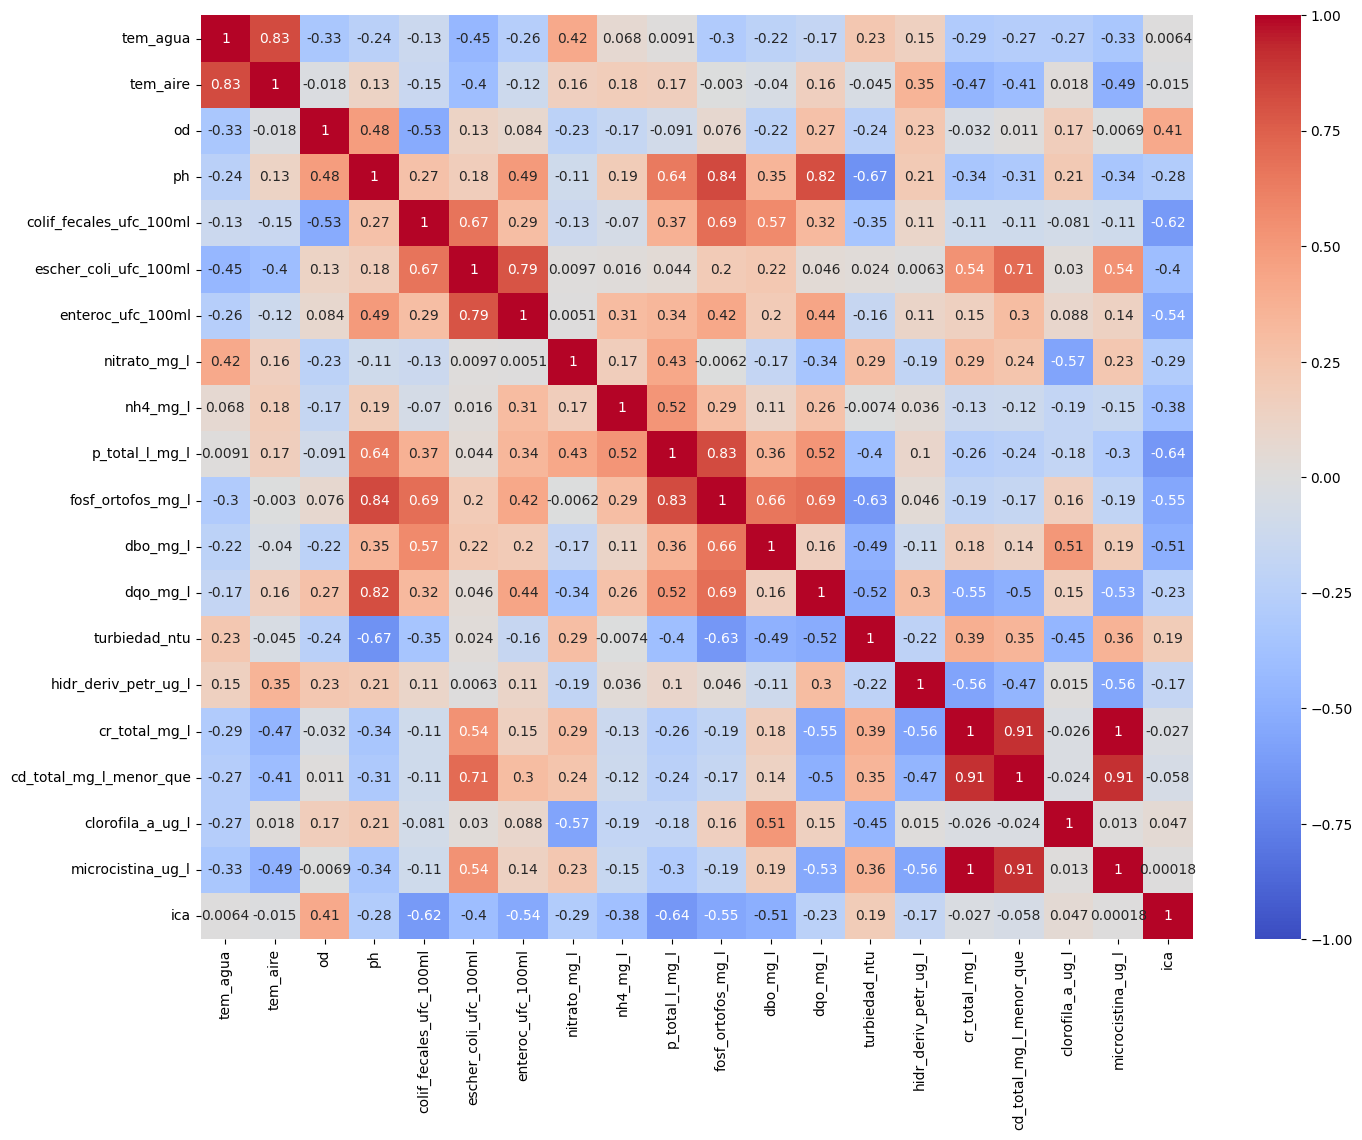

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# imprimimos la matriz como un heatmap
plt.figure(figsize=(16,12))
sns.heatmap(correlation_matrix, vmin=-1.0, vmax=1.0, center=0.0, annot=True, cmap= 'coolwarm')
plt.show()

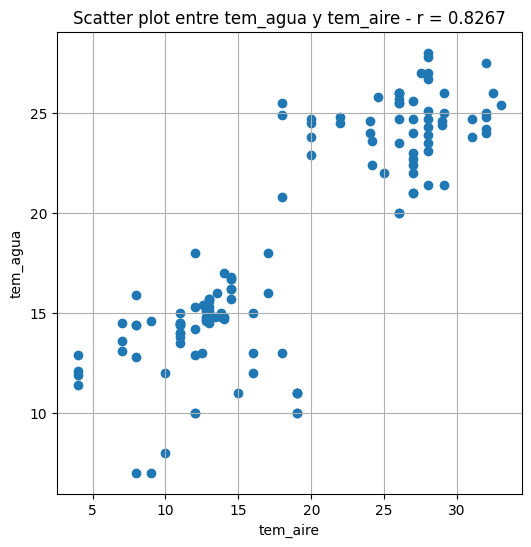

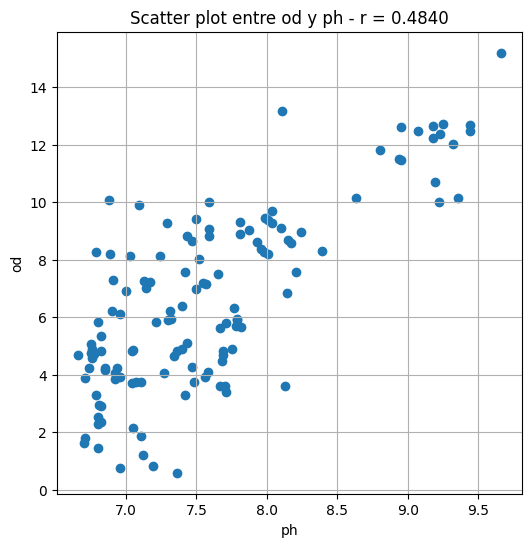

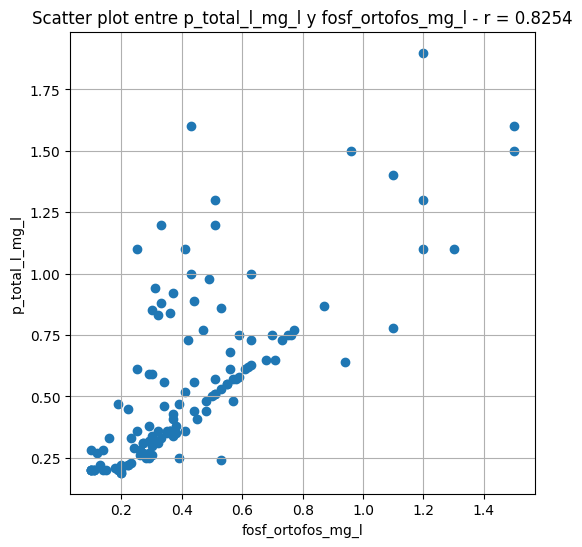

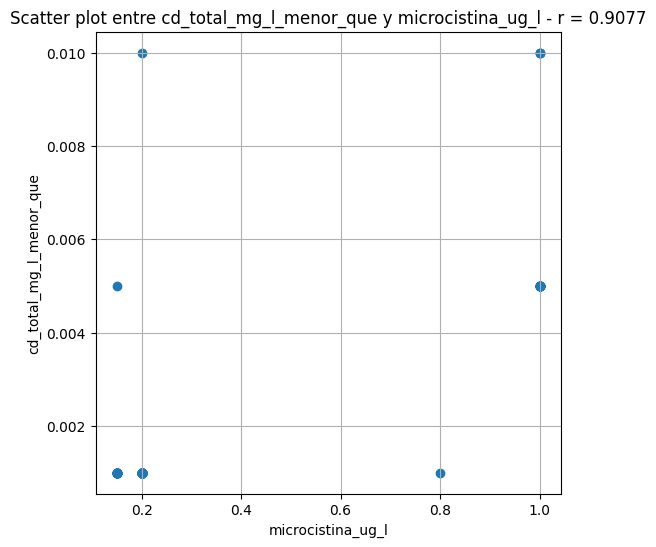

In [33]:
for i, col in enumerate(correlation_matrix_umbralizada.columns):
  # y por cada una de las filas (para eso usamos el índice)
  for j in range(i,len(correlation_matrix_umbralizada.index)):
    # extraemos el nombre de la fila en la que estamos
    row = correlation_matrix_umbralizada.index[j]
    # si en esa posición tenemos un True en la matriz umbralizada
    if correlation_matrix_umbralizada.loc[row, col]:
      # nos traemos el valor de esa correlación
      correlation = correlation_matrix.loc[row, col]
      # representamos en un scatter plot cuadrado los valores de ambas variables
      plt.figure(figsize=(6, 6))
      plt.scatter(preprocessed_dataset[row], preprocessed_dataset[col])
      # y lo mostramos bonito
      plt.title(f"Scatter plot entre {col} y {row} - r = {correlation:.4f}")
      plt.xlabel(row)
      plt.ylabel(col)
      plt.grid(True)
      plt.show()

In [34]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Seleccionamos las columnas numéricas para la normalización
numeric_cols = preprocessed_dataset.select_dtypes(include=np.number).columns

# Creamos un objeto MinMaxScaler
scaler = MinMaxScaler()

preprocessed_dataset_scaler = preprocessed_dataset.copy()
# Ajustamos el scaler a los datos y transformamos los datos
preprocessed_dataset_scaler[numeric_cols] = scaler.fit_transform(preprocessed_dataset[numeric_cols])

# Imprimimos el DataFrame con los datos normalizados
preprocessed_dataset_scaler.head()

,sitios,campaña,tem_agua,tem_aire,od,ph,olores,color,espumas,mat_susp,...,dbo_mg_l,dqo_mg_l,turbiedad_ntu,hidr_deriv_petr_ug_l,cr_total_mg_l,cd_total_mg_l_menor_que,clorofila_a_ug_l,microcistina_ug_l,ica,calidad_de_agua
0,Canal Villanueva y Río Luján,verano,0.885714,0.793103,0.227242,0.100000,False,False,False,True,...,0.000000,0.201742,0.268649,0.279496,0.000000,0.000000,0.000000,0.000000,0.333333,Extremadamente deteriorada
1,Canal Villanueva y Río Luján,otoño,0.409524,0.310345,0.526352,0.043333,False,False,False,False,...,0.175000,NaN,0.122379,0.309517,0.022616,0.444444,0.011902,1.000000,0.458333,Muy deteriorada
2,Canal Villanueva y Río Luján,invierno,0.371429,0.310345,0.637235,0.143333,False,False,False,False,...,0.000000,0.201742,0.107752,0.279496,0.000000,0.000000,0.011902,0.058824,0.791667,Muy deteriorada
3,Canal Villanueva y Río Luján,primavera,0.828571,0.862069,0.457906,0.083333,False,False,False,True,...,0.000000,0.208999,0.195514,0.279496,0.000000,0.000000,0.004237,0.058824,0.604167,Muy deteriorada
5,Río Lujan y Arroyo Caraguatá,otoño,0.414286,0.310345,0.431896,0.113333,False,False,False,False,...,0.191667,NaN,0.122379,0.429601,0.022616,0.444444,0.011902,1.000000,0.270833,Extremadamente deteriorada


In [35]:
from sklearn.cluster import KMeans

nro_cluster = 4

# separamos las features de los nombres de los países
preprocessed_dataset_scaler = preprocessed_dataset_scaler.dropna()
sitios = preprocessed_dataset_scaler['sitios']
features_sitios = preprocessed_dataset_scaler.drop(columns=['sitios','campaña','olores','color','espumas','mat_susp','calidad_de_agua'])

# inicializamos un objeto de la clase KMeans con el modelo
kmeans = KMeans(n_clusters=nro_cluster, verbose=0, random_state=10)
# lo aplicamos sobre nuestros datos para hallar los centroides
kmeans.fit(features_sitios)
# y obtenemos los clusters a los que fueron asignadas las muestras
clusters_kmeans = kmeans.predict(features_sitios)
print(clusters_kmeans)

[1 0 1 3 1 3 3 1 1 2 3 1 1 0 1 3 1 2 3 1 1 0 1 1 1 1 0 1 1 0 1 1 2 3 1 3 2
 1 1 2 0 1 1 2 3 1 1 2 3 1 3 1 2 3 1 2 1 2 3 1 2 0 2 0 1 2 0 1 1 0 1 2 0 2
 0 1 2 0 1 2 0 1 2 0 1 2 0 1 1 1 2 0 1 0 1 3 1 1 0 3 0 1 0 0 0]


In [36]:
import pandas as pd

# Creamos un DataFrame con los países y los clusters asignados
cluster_df = pd.DataFrame({'Sitios': sitios, 'Cluster': clusters_kmeans})

# Imprimimos los países de cada cluster
for cluster_num in range(nro_cluster):
  print(f"\nCluster {cluster_num}:")
  print(cluster_df[cluster_df['Cluster'] == cluster_num]['Sitios'].tolist())


Cluster 0:
['Canal Villanueva y Río Luján', 'Río Reconquista y Río Lujan', 'Río Capitán y Río San Antonio', 'Del Arca', 'Reserva Ecológica', 'Reserva Barrio El Ceibo ', 'Arroyo Santo Domingo', 'Espora 400 m', 'Náutico 400 m', 'Pejerrey Club 400 m', 'Calle 14 y Costa - Salida cloaca', 'Puerto Trinidad calle 47', 'Costanera Hudson Calle 63', 'Camping Eva Perón', 'Toma de agua Club de Pesca', 'Arroyo El Gato', 'Ensenada Prefectura Isla Santiago', 'Balneario Palo Blanco', 'Balneario Municipal', 'Balneario Municipal', 'Playa La Balandra', 'Playa La Balandra', 'Playa La Balandra']

Cluster 1:
['Canal Villanueva y Río Luján', 'Canal Villanueva y Río Luján', 'Río Lujan y Arroyo Caraguatá', 'Canal Aliviador y Río Lujan', 'Río Carapachay y Arroyo Gallo Fiambre', 'Río Carapachay y Arroyo Gallo Fiambre', 'Río Reconquista y Río Lujan', 'Río Reconquista y Río Lujan', 'Río Lujan y Canal San Fernando', 'Río Lujan y Canal San Fernando', 'Río Capitán y Río San Antonio', 'Río Capitán y Río San Antonio',

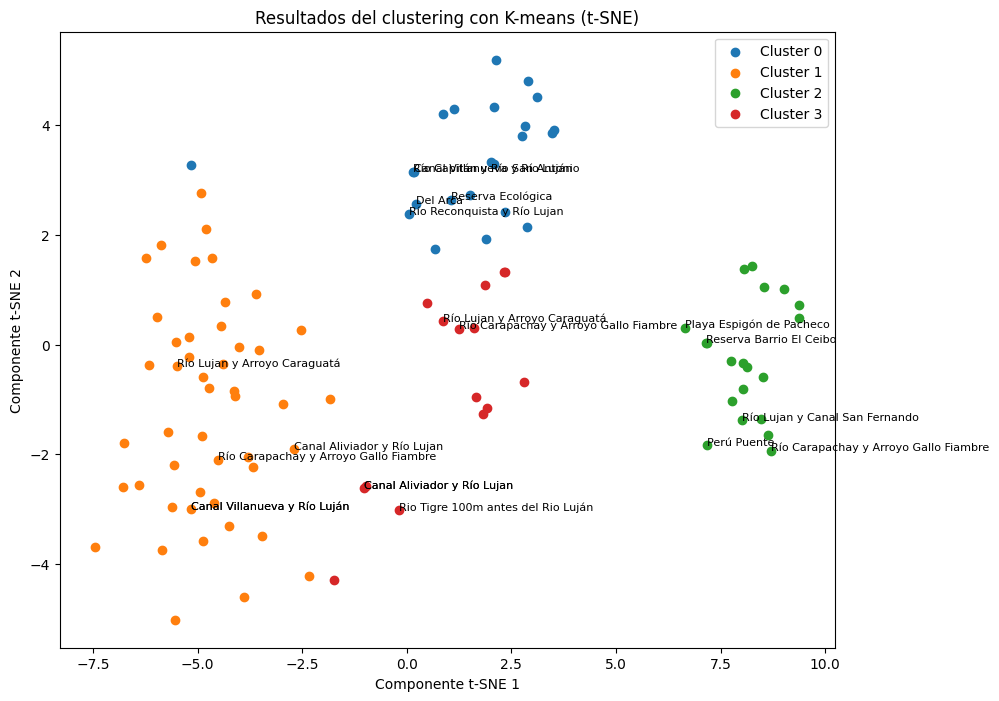

In [37]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Reducir la dimensionalidad de los datos usando t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(features_sitios)

# Crear un DataFrame con los resultados de t-SNE y los clusters
tsne_df = pd.DataFrame({'x': tsne_results[:, 0], 'y': tsne_results[:, 1], 'Cluster': clusters_kmeans, 'Country': sitios})

# Graficar los resultados de t-SNE, coloreando los puntos según el cluster
plt.figure(figsize=(10, 8))
for cluster_num in range(nro_cluster):
  plt.scatter(tsne_df[tsne_df['Cluster'] == cluster_num]['x'], tsne_df[tsne_df['Cluster'] == cluster_num]['y'], label=f'Cluster {cluster_num}')

  # Seleccionar 5 países para etiquetar en cada cluster, incluyendo Argentina si está presente
  countries_to_label = tsne_df[tsne_df['Cluster'] == cluster_num]['Country'].tolist()
  if 'Argentina' in countries_to_label:
    countries_to_label.remove('Argentina')
    countries_to_label = ['Argentina'] + countries_to_label[:4]
  else:
    countries_to_label = countries_to_label[:5]

  for country in countries_to_label:
    row = tsne_df[(tsne_df['Cluster'] == cluster_num) & (tsne_df['Country'] == country)]
    if not row.empty:
      plt.text(row['x'].values[0], row['y'].values[0], country, fontsize=8)

plt.xlabel('Componente t-SNE 1')
plt.ylabel('Componente t-SNE 2')
plt.title('Resultados del clustering con K-means (t-SNE)')
plt.legend()
plt.show()

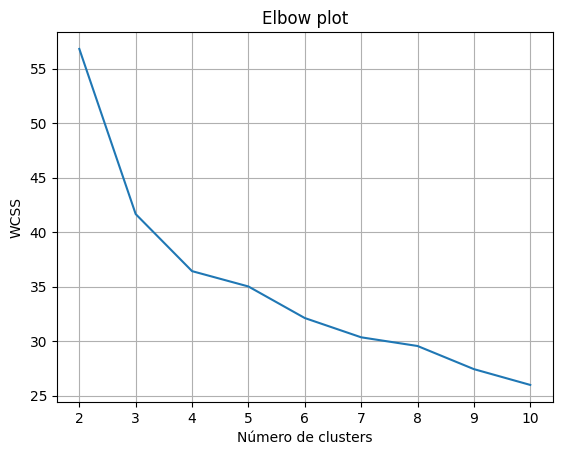

In [38]:
from sklearn.cluster import KMeans

# calculamos cada KMean para cada número de clusters, y nos quedamos con el valor
wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=10)
    kmeans.fit(features_sitios)
    wcss.append(kmeans.inertia_)

# graficamos el elbow plot
plt.plot(range(2, 11), wcss)
plt.title('Elbow plot')
plt.grid("True")
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

In [39]:
# inicializamos un contador
counter = 0
# creamos una lista para guardar los valores únicos
unique_values = []
# iteramos sobre los valores de la columna
for val in preprocessed_dataset["sitios"]:
  # si el valor incluye "Data Scientist"
  if "Playa" in val or "cloaca" in val  or "Balneario" in val or "Pesca" in val or "Club" in val or "Puerto" in val:
    # incrementamos el contador
    counter += 1
    # si el valor no esta en la lista de valores únicos
    if val not in unique_values:
      # lo agregamos
      unique_values.append(val)

# imprimimos el contador y la lista de valores únicos
print("Cantidad de valores que incluyen 'Playa' o  cloaca:", counter)
print("Valores únicos:", unique_values)
unique_values

Cantidad de valores que incluyen 'Playa' o  cloaca: 39
Valores únicos: ['Playa Espigón de Pacheco', 'Puerto de Olivos Espigón', 'Pejerrey Club 400 m', 'Calle 14 y Costa - Salida cloaca', 'Puerto Trinidad calle 47', 'Toma de agua Club de Pesca', 'Balneario Palo Blanco', 'Diagonal 66 (descarga cloaca)', 'Playa La Bagliardi', 'Balneario Municipal', 'Playa La Balandra']


['Playa Espigón de Pacheco',
 'Puerto de Olivos Espigón',
 'Pejerrey Club 400 m',
 'Calle 14 y Costa - Salida cloaca',
 'Puerto Trinidad calle 47',
 'Toma de agua Club de Pesca',
 'Balneario Palo Blanco',
 'Diagonal 66 (descarga cloaca)',
 'Playa La Bagliardi',
 'Balneario Municipal',
 'Playa La Balandra']

In [40]:

datos_contactos = preprocessed_dataset[preprocessed_dataset['sitios'].isin(unique_values)]
datos_contactos.columns

Index(['sitios', 'campaña', 'tem_agua', 'tem_aire', 'od', 'ph', 'olores',
       'color', 'espumas', 'mat_susp', 'colif_fecales_ufc_100ml',
       'escher_coli_ufc_100ml', 'enteroc_ufc_100ml', 'nitrato_mg_l',
       'nh4_mg_l', 'p_total_l_mg_l', 'fosf_ortofos_mg_l', 'dbo_mg_l',
       'dqo_mg_l', 'turbiedad_ntu', 'hidr_deriv_petr_ug_l', 'cr_total_mg_l',
       'cd_total_mg_l_menor_que', 'clorofila_a_ug_l', 'microcistina_ug_l',
       'ica', 'calidad_de_agua'],
      dtype='object')

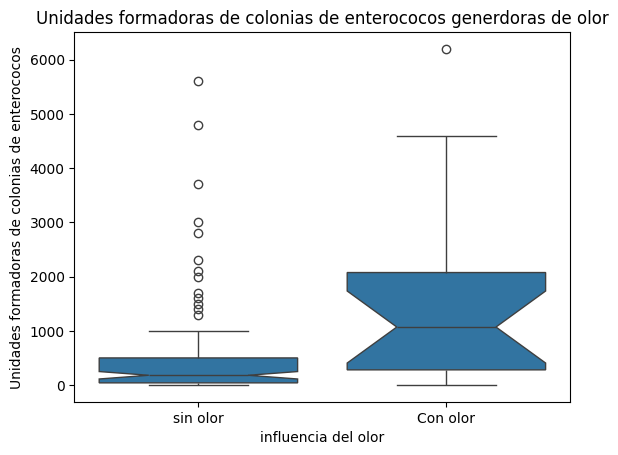

In [41]:

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='olores', y='enteroc_ufc_100ml', data=preprocessed_dataset, notch=True)
plt.title("Unidades formadoras de colonias de enterococos generdoras de olor")
plt.xlabel("influencia del olor")
plt.xticks(ticks=[0, 1], labels=["sin olor", "Con olor"])
plt.ylabel("Unidades formadoras de colonias de enterococos")
plt.show()

In [42]:
from scipy.stats import shapiro

# Separamos los datos en dos grupos, desarrollados y en vías de desarrollo
con_olor = preprocessed_dataset[preprocessed_dataset['olores'] == True]['enteroc_ufc_100ml']
sin_olor = preprocessed_dataset[preprocessed_dataset['olores'] == False]['enteroc_ufc_100ml']

#Analizamos normalidad
# Test de Shapiro-Wilk para datos con olor
stat, p = shapiro(con_olor)
print(f"Test de Shapiro-Wilk para datos con olores: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para países en vías de desarrollo
stat, p = shapiro(sin_olor)
print(f"Test de Shapiro-Wilk para datos sin olores: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para datos con olores: Estadístico=0.827, p-valor=0.004
Test de Shapiro-Wilk para datos sin olores: Estadístico=0.564, p-valor=0.000


Vemos que los p valor que obtuvimos son menores a nuestro nivel de confianza por lo que los datos no son normales. Por lo que no es posible hacer un test t para estas variables pero evaluaremos homocedasticidad para ver si podemos hacer el test Mann Whitney

In [43]:
# Test de Levene para comparar homocedasticidad
import scipy.stats as stats
stat, p = stats.levene(sin_olor, con_olor)
print(f"Test de Levene para enteroc_ufc_100ml: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para enteroc_ufc_100ml: Estadístico=13.341, p-valor=0.000


Dado que el p valor es menor a 0,05 podemos ver que no hay homocedasticidad por lo que nos inclinaremos por un testeo de Kruskall-Wallis

In [44]:
# Test de Kruskal-Wallis para comparar enteroc_ufc_100ml entre lugares con y sin olor
stat, p = stats.kruskal(sin_olor, con_olor)
print(f"Test de Kruskal-Wallis para enteroc_ufc_100ml: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en el enteroc_ufc_100ml entre lugares con olor y lugares sin olor.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en el enteroc_ufc_100ml entre lugares con olor y lugares sin olor")

Test de Kruskal-Wallis para enteroc_ufc_100ml: Estadístico=11.452, p-valor=0.001
Se rechaza la hipótesis nula.
Existe una diferencia significativa en el enteroc_ufc_100ml entre lugares con olor y lugares sin olor


git add .
git commit -m "Actualizacion de los datos"
git push origin main